In [7]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import itertools

# 读取数据(第一天的tapes数据)
data = pd.read_csv('tapes1.csv', header=None, names=['Time', 'Price', 'Volume'])

D:\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
D:\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
D:\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
D:\anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters f

Best RMSE: 1.5843528424762794
Best order: (4, 2, 4)


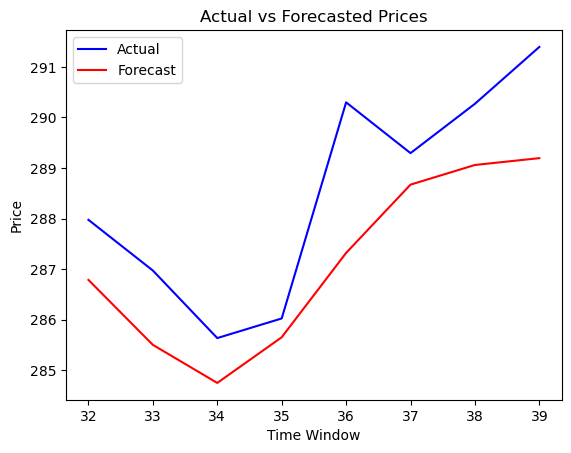

In [8]:
# 每600组数据求均值
data_mean = data.groupby(data.index // 600).mean()

# 划分训练集和测试集
train_data, test_data = train_test_split(data_mean['Price'], test_size=0.2, shuffle=False)

# 寻找最优的ARIMA模型参数
best_rmse = float('inf')
best_order = None
for p, d, q in itertools.product(range(5), range(5), range(5)):
    if p == 0 and d == 0 and q == 0:
        continue
    try:
        model = ARIMA(train_data, order=(p,d,q))
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=len(test_data))
        rmse = mean_squared_error(test_data, forecast, squared=False)
        if rmse < best_rmse:
            best_rmse = rmse
            best_order = (p,d,q)
    except:
        continue

print(f'Best RMSE: {best_rmse}')
print(f'Best order: {best_order}')

# 训练最优的ARIMA模型
model = ARIMA(train_data, order=best_order)
model_fit = model.fit()

# 预测测试集的价格
forecast = model_fit.forecast(steps=len(test_data))

# 绘制预测结果和实际价格
plt.plot(test_data.index, test_data, label='Actual', color='blue')
plt.plot(test_data.index, forecast, label='Forecast', color='red')
plt.xlabel('Time Window')
plt.ylabel('Price')
plt.title('Actual vs Forecasted Prices')
plt.legend()
plt.show()